# Descriptives (using the csv file)

In [1]:
import json
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the csv

In [3]:
df_clean_data = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\clean_data_bikes.csv')

In [4]:
df_clean_data

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,45943225,2020-12-23,942,11822,53.580518,9.999531,Wednesday
1,46123555,2020-12-24,450,11822,53.580518,9.999531,Thursday
2,46306423,2020-12-25,1019,11822,53.580518,9.999531,Friday
3,46482546,2020-12-26,577,11822,53.580518,9.999531,Saturday
4,46654269,2020-12-27,374,11822,53.580518,9.999531,Sunday
...,...,...,...,...,...,...,...
45811,207516616,2021-07-31,3270,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Saturday
45812,208610482,2021-08-01,4133,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Sunday
45813,210228984,2021-08-02,7873,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Monday
45814,211941658,2021-08-03,9845,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Tuesday


In [5]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45816 entries, 0 to 45815
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   @iot.id         45816 non-null  int64 
 1   phenomenonDate  45816 non-null  object
 2   result          45816 non-null  int64 
 3   id              45816 non-null  int64 
 4   lat             45816 non-null  object
 5   long            45816 non-null  object
 6   weekday         45816 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [6]:
df_clean_data.dtypes

@iot.id            int64
phenomenonDate    object
result             int64
id                 int64
lat               object
long              object
weekday           object
dtype: object

In [7]:
#  I would like to change phenomenonDate back to the format datetime64 (this got lost when saving the file as csv)

In [8]:
df_clean_data=df_clean_data.astype({'phenomenonDate': 'datetime64'})

In [9]:
df_clean_data.dtypes

@iot.id                    int64
phenomenonDate    datetime64[ns]
result                     int64
id                         int64
lat                       object
long                      object
weekday                   object
dtype: object

In [10]:
#min/max values

df_clean_data.max()

@iot.id                       239386458
phenomenonDate      2021-08-25 00:00:00
result                            13051
id                                14900
lat               [9.999314, 53.580039]
long              [9.999405, 53.580105]
weekday                       Wednesday
dtype: object

In [11]:
df_clean_data.min()

@iot.id                      39365554
phenomenonDate    2020-01-01 00:00:00
result                              0
id                              11798
lat                         53.456414
long                        10.010242
weekday                        Friday
dtype: object

In [12]:
df_clean_data.loc[df_clean_data["result"]==0]

,@iot.id,phenomenonDate,result,id,lat,long,weekday
595,39365559,2020-01-01,0,11842,53.491655,10.018671,Wednesday
598,39366241,2020-01-04,0,11842,53.491655,10.018671,Saturday
600,39366543,2020-01-07,0,11842,53.491655,10.018671,Tuesday
601,39366460,2020-01-06,0,11842,53.491655,10.018671,Monday
602,39366938,2020-01-10,0,11842,53.491655,10.018671,Friday
...,...,...,...,...,...,...,...
42541,39369865,2020-01-29,0,11846,53.491671,10.018558,Wednesday
42544,39370256,2020-02-01,0,11846,53.491671,10.018558,Saturday
42545,39370773,2020-02-03,0,11846,53.491671,10.018558,Monday
42546,39371089,2020-02-05,0,11846,53.491671,10.018558,Wednesday


In [13]:
#drop all observations which have 0 as result
df_clean_data=df_clean_data[df_clean_data.result!=0]

In [14]:
### --> range of dates: From 2020-01-01 to  2021-08-25 the vehicles are counted

In [15]:
# How many Zählstellen are measuring every day? 

## pivot: count numbers of Zählstellen("id") per phenomenondate
CountZaehlstelle = df_clean_data.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")
CountZaehlstelle

,id
phenomenonDate,
2020-01-01,8
2020-01-02,10
2020-01-03,11
2020-01-04,10
2020-01-05,10
...,...
2021-08-21,114
2021-08-22,115
2021-08-23,115


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

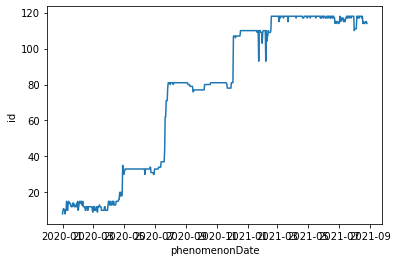

In [16]:
sns.lineplot(data=CountZaehlstelle, x = "phenomenonDate", y = "id")

In [17]:
# Combined number of bikes measured each individual day
SumBikes = df_clean_data.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumBikes

,result
phenomenonDate,
2020-01-01,1080
2020-01-02,3153
2020-01-03,3022
2020-01-04,2039
2020-01-05,1906
...,...
2021-08-21,146711
2021-08-22,50919
2021-08-23,209427


In [18]:
#Bikes in Summer (summer holidays 24.6.-4.8.--> Look at July) vs. winter (December until 4th Jan (end of holidays))
# create new dataset with only those months

#Summer
start_date = '2021-07-01'
end_date = '2021-07-30'

mask = (df_clean_data['phenomenonDate'] > start_date) & (df_clean_data['phenomenonDate'] <= end_date)

df_clean_data_summer = df_clean_data.loc[mask]

df_clean_data_summer

,@iot.id,phenomenonDate,result,id,lat,long,weekday
546,164277052,2021-07-02,3774,11822,53.580518,9.999531,Friday
547,165904889,2021-07-03,3563,11822,53.580518,9.999531,Saturday
548,167338797,2021-07-04,3588,11822,53.580518,9.999531,Sunday
549,168981824,2021-07-05,3023,11822,53.580518,9.999531,Monday
550,170411259,2021-07-06,3661,11822,53.580518,9.999531,Tuesday
...,...,...,...,...,...,...,...
45806,200155417,2021-07-26,7850,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Monday
45807,201593083,2021-07-27,10079,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Tuesday
45808,203189121,2021-07-28,9199,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Wednesday
45809,204889063,2021-07-29,8483,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Thursday


In [19]:
SumBikes_summer = df_clean_data_summer.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumBikes_summer

,result
phenomenonDate,
2021-07-02,159278
2021-07-03,140137
2021-07-04,117690
2021-07-05,132291
2021-07-06,152471
2021-07-07,181485
2021-07-08,153874
2021-07-09,105671
2021-07-10,127548


In [20]:
SumBikes_summer.reset_index(level=0, inplace=True)

In [21]:
SumBikes_summer.dtypes

phenomenonDate    datetime64[ns]
result                     int64
dtype: object

<AxesSubplot:xlabel='phenomenonDate', ylabel='result'>

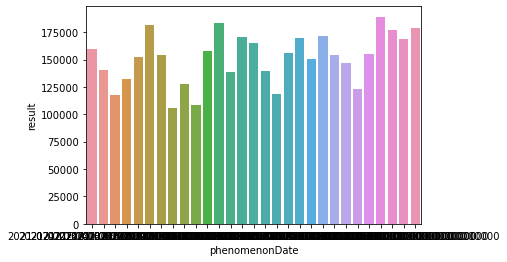

In [22]:
sns.barplot(x="phenomenonDate", y="result", data=SumBikes_summer)


In [23]:
SumBikes_summer.max()

phenomenonDate    2021-07-30 00:00:00
result                         189068
dtype: object

In [24]:
SumBikes_summer.min()

phenomenonDate    2021-07-02 00:00:00
result                         105671
dtype: object

In [25]:
#Winter 
start_date_winter = '2020-12-01'
end_date_winter = '2021-01-04'

mask_winter = (df_clean_data['phenomenonDate'] > start_date_winter) & (df_clean_data['phenomenonDate'] <= end_date_winter)

df_clean_data_winter = df_clean_data.loc[mask_winter]

df_clean_data_winter

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,45943225,2020-12-23,942,11822,53.580518,9.999531,Wednesday
1,46123555,2020-12-24,450,11822,53.580518,9.999531,Thursday
2,46306423,2020-12-25,1019,11822,53.580518,9.999531,Friday
3,46482546,2020-12-26,577,11822,53.580518,9.999531,Saturday
4,46654269,2020-12-27,374,11822,53.580518,9.999531,Sunday
...,...,...,...,...,...,...,...
45598,45044546,2020-12-18,6786,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Friday
45599,45224073,2020-12-19,3837,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Saturday
45600,45398371,2020-12-20,4002,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Sunday
45601,45579723,2020-12-21,5529,11798,"[9.999282, 53.580056]","[9.999377, 53.580126]",Monday


In [26]:
SumBikes_winter = df_clean_data_winter.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumBikes_winter

,result
phenomenonDate,
2020-12-02,101920
2020-12-03,96547
2020-12-04,115394
2020-12-05,77482
2020-12-06,49842
2020-12-07,131261
2020-12-08,145690
2020-12-09,133358
2020-12-10,130212


In [27]:
SumBikes_winter.reset_index(level=0, inplace=True)

<AxesSubplot:xlabel='phenomenonDate', ylabel='result'>

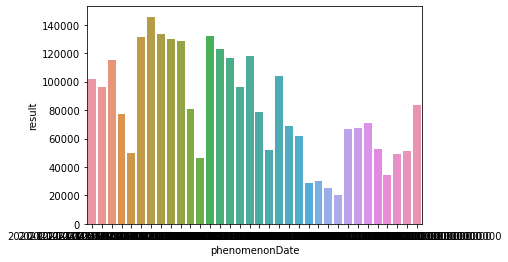

In [28]:
sns.barplot(x="phenomenonDate", y="result", data=SumBikes_winter)

In [29]:
SumBikes_winter.min()

phenomenonDate    2020-12-02 00:00:00
result                          20018
dtype: object

In [30]:
SumBikes_winter.max()

phenomenonDate    2021-01-04 00:00:00
result                         145690
dtype: object

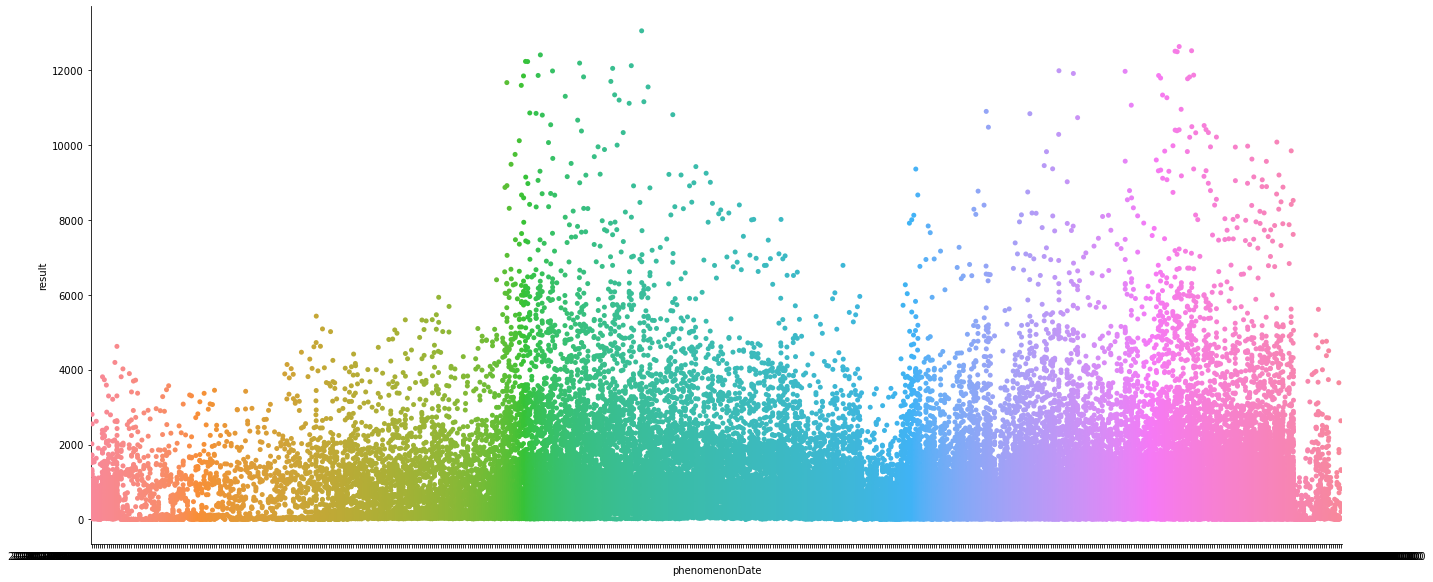

In [31]:
# How much traffic is there all combined every day?
sns.catplot(x="phenomenonDate", y="result", data = df_clean_data, height=8, aspect=2.5)

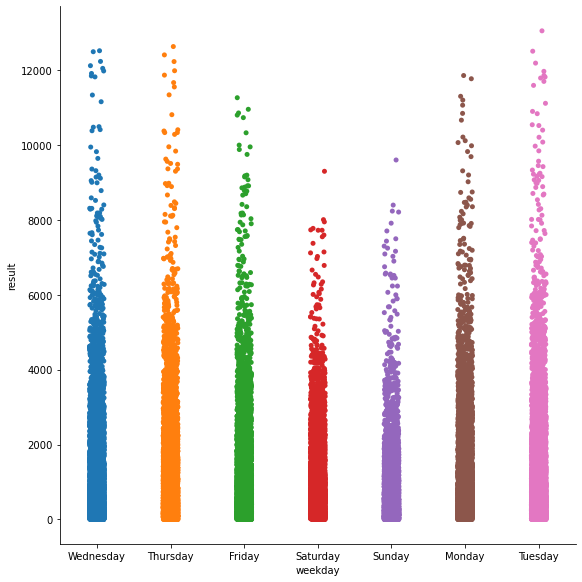

In [32]:
# Amount of bikes per weekday
sns.catplot(x="weekday", y="result", data = df_clean_data, height=8)

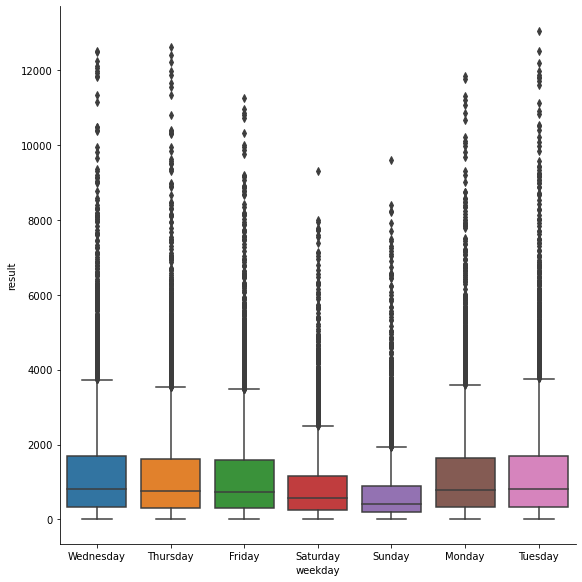

In [33]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_clean_data, height = 8)

In [34]:
# Calculating the average of each weekday
df_clean_data_mean=df_clean_data.groupby(['weekday']).mean()



In [35]:
df_clean_data_mean

,@iot.id,result,id
weekday,,,
Friday,8.164030e+07,1177.607176,12331.518325
Monday,8.290005e+07,1204.765331,12332.161325
Saturday,8.217245e+07,870.997359,12331.689189
Sunday,8.237898e+07,703.007722,12331.486023
Thursday,8.124077e+07,1210.835655,12329.491489
Tuesday,8.320400e+07,1282.890683,12331.824877
Wednesday,8.336428e+07,1263.764831,12333.565350


In [36]:
df_clean_data_mean.reset_index(level=0, inplace=True)

In [37]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

<AxesSubplot:xlabel='weekday', ylabel='result'>

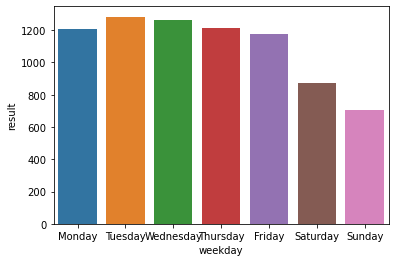

In [38]:
sns.barplot(x="weekday", y="result", data=df_clean_data_mean, order=order)

In [39]:
# Convert single digit weeknumbers to 2-digit weeknumbers (e.g "5" to "05")
# Weeknumbers

df_clean_data["Weeknumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[1])
df_clean_data["yearnumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[0])

In [40]:
def convert_weekno(num_weeknumber):
    if len(str(num_weeknumber)) == 1:
        Weeknumber_clean = '0'+str(num_weeknumber)
    else:
        Weeknumber_clean = str(num_weeknumber)
    return(Weeknumber_clean)

df_clean_data["Weeknumberstring"] = df_clean_data["Weeknumber"].apply(lambda x: convert_weekno(x))

In [41]:
df_clean_data["yearnumber"]=df_clean_data["yearnumber"].astype(object)

In [42]:
# Combine year + weeknumber
df_clean_data["Week in year"] = df_clean_data["yearnumber"].map(str)+df_clean_data["Weeknumberstring"].map(str)

In [43]:
df_clean_data["Week in year"]

0        202052
1        202052
2        202052
3        202052
4        202052
          ...  
45811    202130
45812    202130
45813    202131
45814    202131
45815    202131
Name: Week in year, Length: 45420, dtype: object

In [44]:
df_clean_data.dtypes

@iot.id                      int64
phenomenonDate      datetime64[ns]
result                       int64
id                           int64
lat                         object
long                        object
weekday                     object
Weeknumber                   int64
yearnumber                  object
Weeknumberstring            object
Week in year                object
dtype: object

In [45]:
df_clean_data["Week in year"]=df_clean_data["Week in year"].astype(int)

In [46]:
#for visualization: only keep the dates for which we also have car data
df_clean_data_short = df_clean_data[df_clean_data['Week in year']>=202044]
df_clean_data_short = df_clean_data_short[df_clean_data_short['Week in year']<=202132]

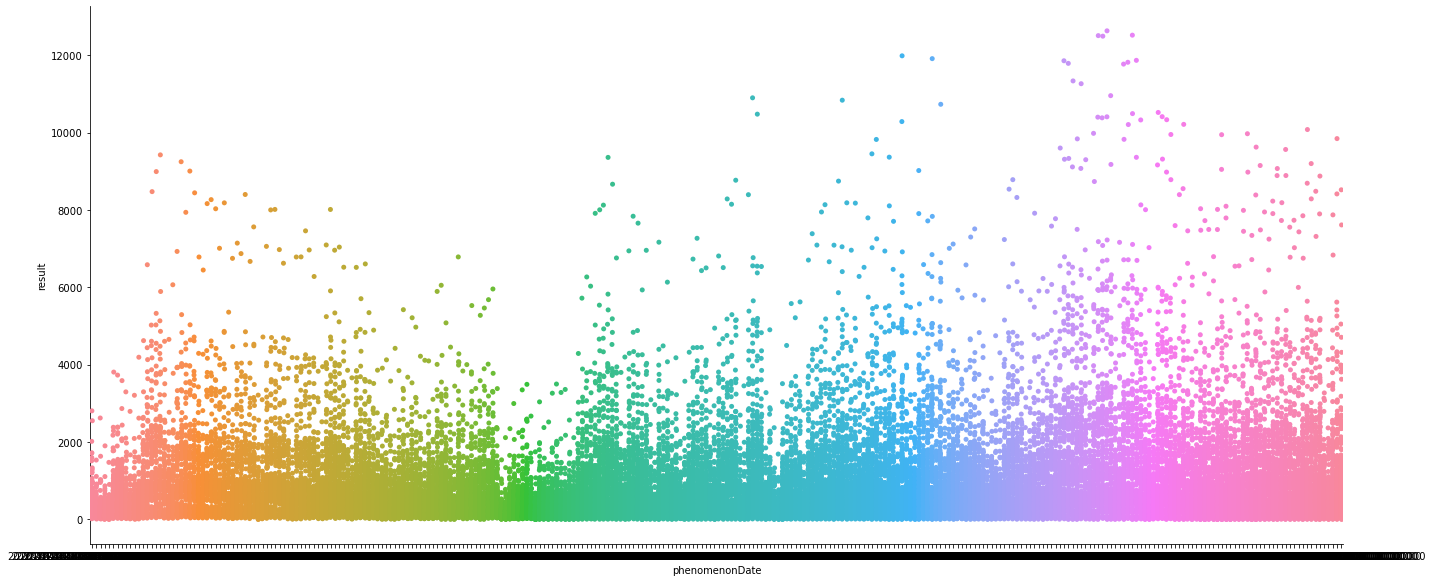

In [47]:
sns.catplot(x="phenomenonDate", y="result", data = df_clean_data_short, height=8, aspect=2.5)

In [48]:
#Calculating the average of each week:
df_clean_data_weekmean=df_clean_data.groupby(['Week in year']).mean()


In [50]:
df_clean_data_weekmean.reset_index(level=0, inplace=True)

In [51]:
columns = ['Week in year','result']

df_clean_data_weekmean=df_clean_data_weekmean[columns]

In [52]:
df_clean_data_weekmean

,Week in year,result
0,202001,228.571429
1,202002,575.538462
2,202003,686.191489
3,202004,1112.494505
4,202005,748.919540
...,...,...
82,202130,1251.314427
83,202131,1301.646766
84,202132,1498.173544
85,202133,1091.966418


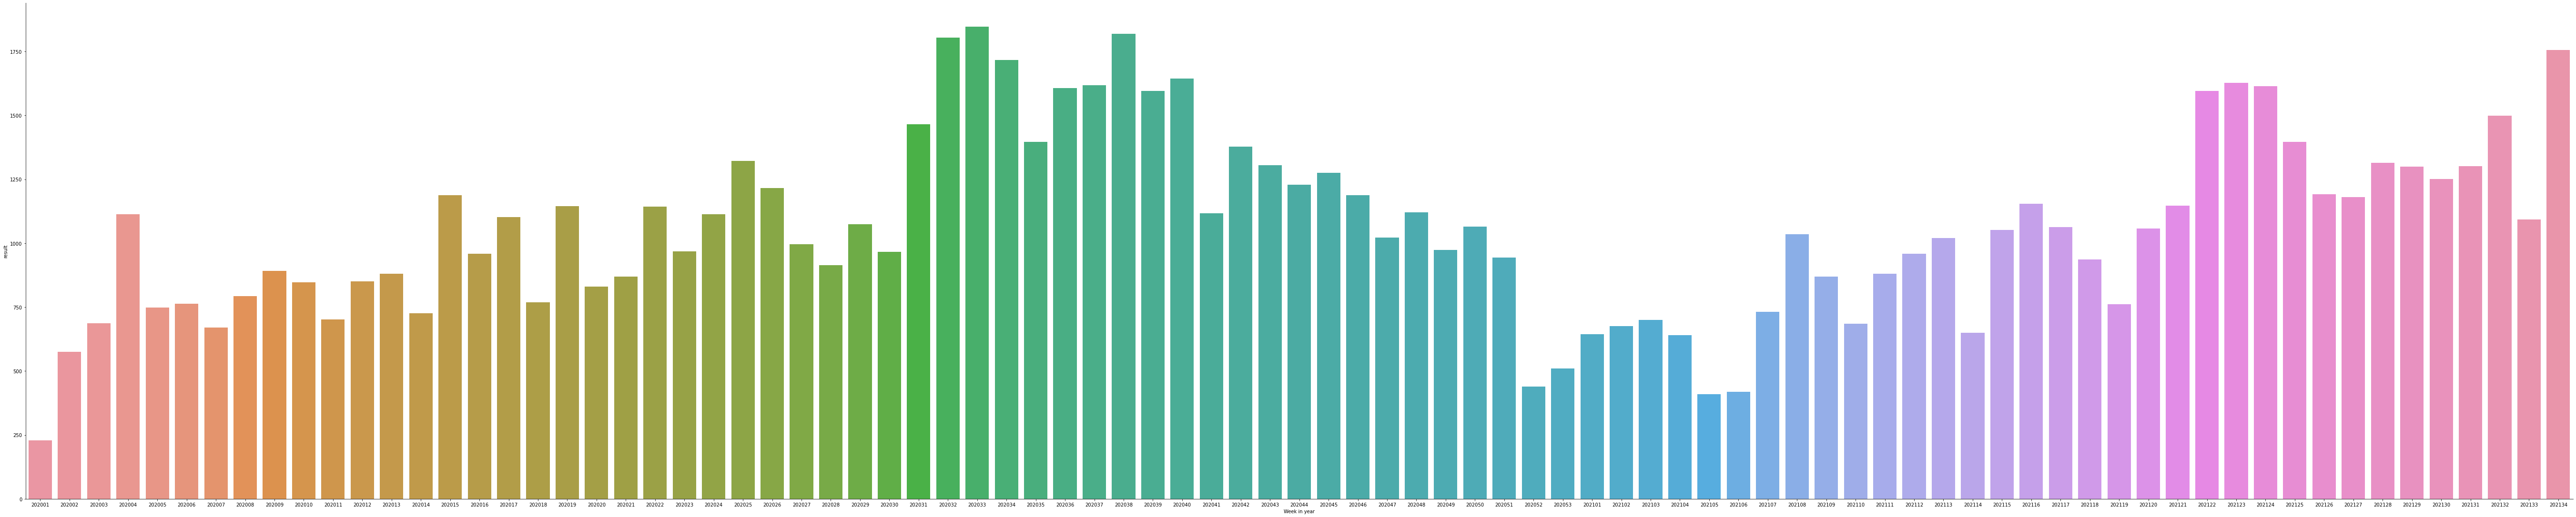

In [54]:
sns.catplot(x="Week in year", y="result", data=df_clean_data_weekmean, height=15, aspect=5, kind = "bar")

In [55]:
df_clean_data_weekmean.nsmallest(10, 'result')

,index,Week in year,result
0,0,202001,228.571429
57,57,202105,408.994688
58,58,202106,419.467550
51,51,202052,439.267532
52,52,202053,509.898701
1,1,202002,575.538462
56,56,202104,639.487484
53,53,202101,643.109091
66,66,202114,649.816970
6,6,202007,670.927711


In [56]:
#Explanation lowest traffic weeks
#winter and christmasholidays (first and last weeks in the year)

In [57]:
#save in csv format
df_clean_data_weekmean.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\bikemean.csv',index=False)